                                      **** Task 1 ****

**** Loading the data set (a)****

In [220]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

# Read the CSV file into a DataFrame with error handling
try:
    dataset_path = os.path.join(os.path.dirname(os.path.abspath('__file__')), 'dataset.csv')
    if not os.path.exists(dataset_path):
        raise FileNotFoundError(f"Dataset file not found at: {dataset_path}")
    df = pd.read_csv(dataset_path)
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {str(e)}")


Dataset loaded successfully!


In [221]:
df

,OrderId,UserId,OrderValue,PaymentType,District,OrderSource,OrderType,DeliveryCharge,OrderPlacedDay,OrderConfirmDayOverPhone,IsCartOrder,OrderFromPromotionalEvent,courierService,isRTO
0,2562691,663791,168,MPD,Dhaka,android,normal,25.0,6/26/2019 9:20,6/26/2019 3:30,No,Yes,NaN,No
1,2561859,961083,240,MPD,Dhaka,mobile-site,normal,35.0,6/25/2019 19:05,6/25/2019 13:40,No,Yes,NaN,No
2,2561434,848517,120,MPD,Dhaka,desktop,normal,35.0,6/25/2019 15:28,6/25/2019 9:27,No,Yes,NaN,Yes
3,2561202,276304,185,MPD,Dhaka,android,normal,25.0,6/25/2019 13:27,6/25/2019 7:27,Yes,No,NaN,No
4,2561033,955384,201,MPD,Dhaka,android,normal,25.0,6/25/2019 12:13,6/25/2019 6:56,No,Yes,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2522688,198486,219,MPS,Dhaka,android,normal,25.0,6/1/2019 12:52,6/1/2019 6:58,Yes,Yes,NaN,No
9996,2522686,360784,410,MPD,Patuakhali,mobile-site,normal,65.0,6/1/2019 12:51,6/1/2019 7:15,No,No,NaN,No
9997,2522676,887141,370,MPD,Dhaka,android,normal,25.0,6/1/2019 12:49,6/1/2019 9:39,No,Yes,NaN,Yes
9998,2522675,473073,200,MPD,Dhaka,android,normal,25.0,6/1/2019 12:48,6/1/2019 6:49,Yes,Yes,NaN,No


**** Display the first 5 row  and displaying the summary statistics of the dataset ****


First 5 rows of the dataset:

   OrderId  UserId  OrderValue           PaymentType District  OrderSource  \
0  2562691  663791         168  MPD                     Dhaka      android   
1  2561859  961083         240  MPD                     Dhaka  mobile-site   
2  2561434  848517         120  MPD                     Dhaka      desktop   
3  2561202  276304         185  MPD                     Dhaka      android   
4  2561033  955384         201  MPD                     Dhaka      android   

  OrderType  DeliveryCharge   OrderPlacedDay OrderConfirmDayOverPhone  \
0    normal            25.0   6/26/2019 9:20           6/26/2019 3:30   
1    normal            35.0  6/25/2019 19:05          6/25/2019 13:40   
2    normal            35.0  6/25/2019 15:28           6/25/2019 9:27   
3    normal            25.0  6/25/2019 13:27           6/25/2019 7:27   
4    normal            25.0  6/25/2019 12:13           6/25/2019 6:56   

  IsCartOrder OrderFromPromotionalEvent   courierService  isR

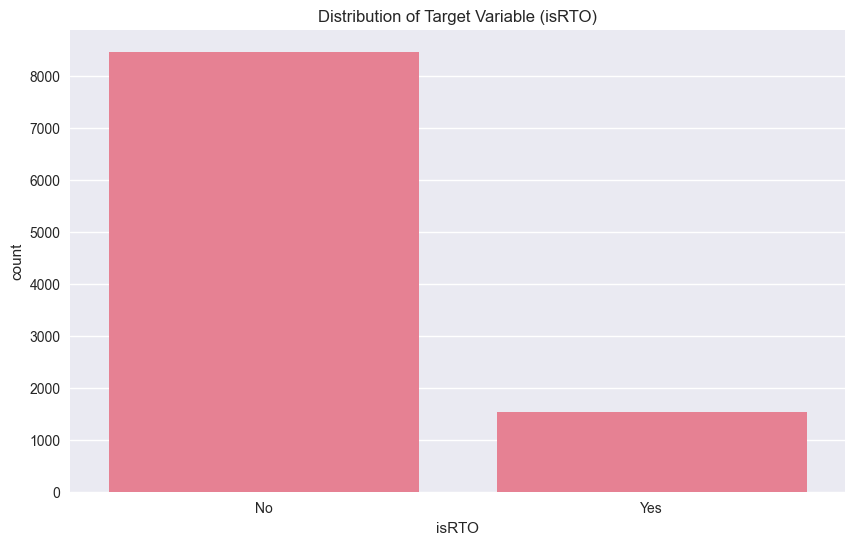

In [222]:
# Display first 5 rows
print('\nFirst 5 rows of the dataset:\n')
print(df.head())

# Display summary statistics
print('\nSummary statistics:\n')
print(df.describe())

# Check missing values
print('\nMissing values in each column:\n')
print(df.isnull().sum())

# Plot distribution of target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='isRTO')
plt.title('Distribution of Target Variable (isRTO)')
plt.show()


**** checking the missing values and show the distribution of the target variable 
PLotting the distribution of any 2 numerical and 2 categorical features ****

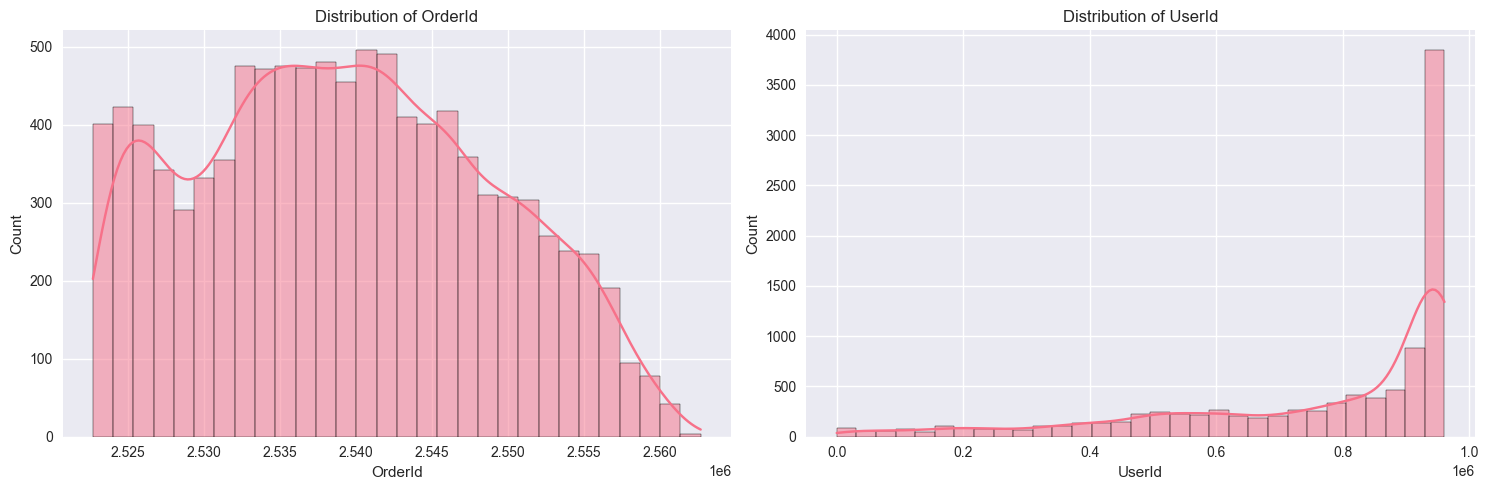

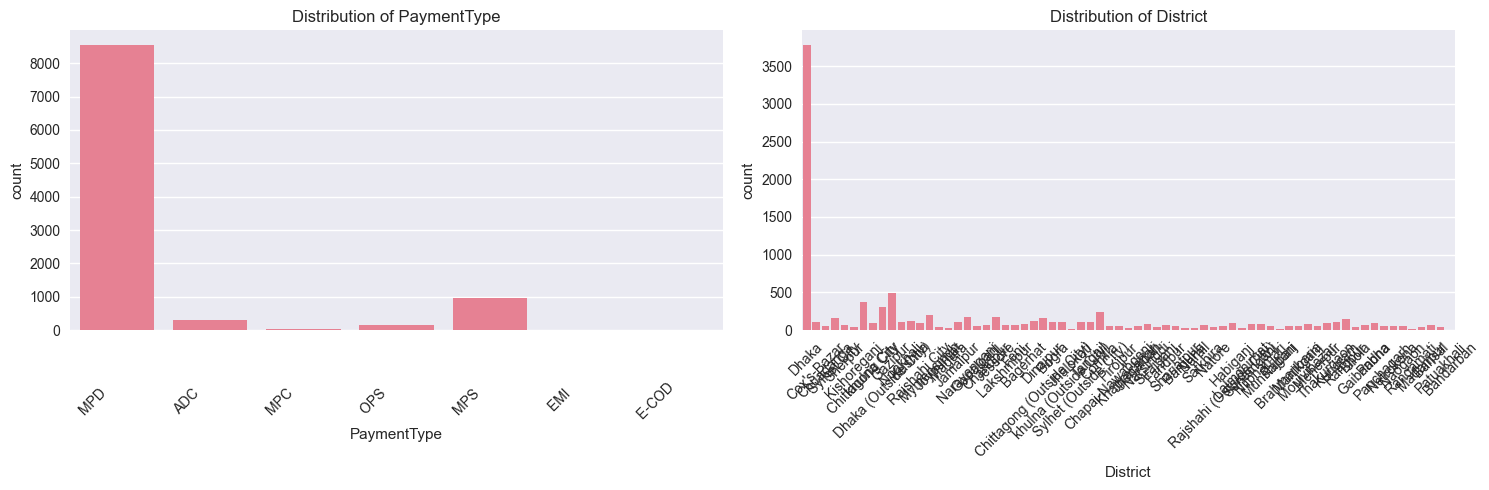

In [223]:
# Plot distribution of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Select 2 numerical features
selected_num_features = numerical_features[:2]

plt.figure(figsize=(15, 5))
for i, feature in enumerate(selected_num_features, 1):
    plt.subplot(1, 2, i)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Plot distribution of categorical features
categorical_features = df.select_dtypes(include=['object']).columns

# Select 2 categorical features
selected_cat_features = categorical_features[:2]

plt.figure(figsize=(15, 5))
for i, feature in enumerate(selected_cat_features, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=df, x=feature)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


**** Plotting the correlation matrix(hitmap) among numerical features ****

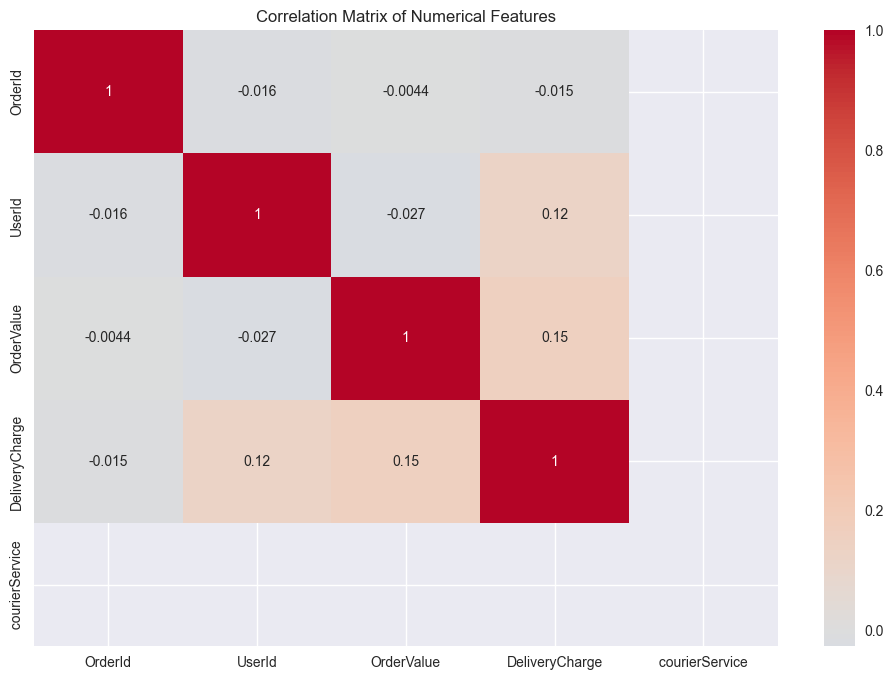

In [224]:
# Plot correlation matrix
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


                                        **** Task 2 ****

In [225]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

# Example DataFrame (you would already have this as 'df')
# df = pd.read_csv('your_data.csv')  # Replace with your data loading process

# Handle missing values
for column in df.columns:
    if df[column].dtype == 'object':  # For categorical columns
        mode_value = df[column].mode()
        # Check if mode_value is empty and use a default string like 'Unknown' if necessary
        df[column] = df[column].fillna(mode_value.iloc[0] if not mode_value.empty else 'Unknown')
    else:  # For numerical columns
        mean_value = df[column].mean()
        df[column] = df[column].fillna(mean_value)

# Check for remaining NaN or infinite values in the dataframe
if df.isna().any().any() or (np.isinf(df).any().any()):
    print("Warning: Data contains NaN or infinite values after imputation.")
    df = df.replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN
    df = df.fillna(0)  # Alternatively, you can fill NaN with 0 or a default value

# Encode categorical variables
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for column in categorical_cols:
    df[column] = le.fit_transform(df[column].astype(str))

# Standardize numerical features
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Print the processed DataFrame
print(df.head())


    OrderId    UserId  OrderValue  PaymentType  District  OrderSource  \
0  2.453522 -0.396028   -0.388121     0.006137 -0.621887    -0.188406   
1  2.366494  0.821594   -0.222740     0.006137 -0.621887     2.753905   
2  2.322039  0.360556   -0.498375     0.006137 -0.621887     1.773135   
3  2.297772 -1.983062   -0.349073     0.006137 -0.621887    -0.188406   
4  2.280094  0.798253   -0.312321     0.006137 -0.621887    -0.188406   

   OrderType  DeliveryCharge  OrderPlacedDay  OrderConfirmDayOverPhone  \
0   0.289643       -0.354243        0.989452                  1.011605   
1   0.289643        0.049100        0.983124                  0.997356   
2   0.289643        0.049100        0.982637                  1.011057   
3   0.289643       -0.354243        0.982151                  1.009961   
4   0.289643       -0.354243        0.981664                  1.009413   

   IsCartOrder  OrderFromPromotionalEvent   courierService      isRTO  
0    -0.816497                   1.009243   

                                     **** Task 3 ****

In [226]:
# Feature Engineering
# Create interaction features between important numerical variables
df['interaction_1'] = df[numerical_cols[0]] * df[numerical_cols[1]]
df['interaction_2'] = df[numerical_cols[0]] + df[numerical_cols[1]]

# Remove highly correlated features (correlation > 0.8)
def remove_correlated_features(df, threshold=0.8):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return df.drop(to_drop, axis=1)

df = remove_correlated_features(df)

# Split features and target
X = df.drop('isRTO', axis=1)
y = df['isRTO']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                                   **** Task 4 ****

In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import pandas as pd

def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    try:
        # Ensure y_train and y_test are 1D arrays
        if np.issubdtype(y_train.dtype, np.floating) or np.issubdtype(y_test.dtype, np.floating):
            # Convert continuous to discrete classes (for example: 3 classes)
            y_train = pd.cut(y_train, bins=3, labels=[0, 1, 2]).astype(int)
            y_test = pd.cut(y_test, bins=3, labels=[0, 1, 2]).astype(int)
        
        # Flatten y_train and y_test if they are 2D
        if len(y_train.shape) > 1:
            y_train = y_train.ravel()
        if len(y_test.shape) > 1:
            y_test = y_test.ravel()

        # Handle missing values
        imputer = SimpleImputer(strategy='mean')
        X_train_imputed = imputer.fit_transform(X_train)
        X_test_imputed = imputer.transform(X_test)

        # Initialize models
        models = {
            'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
            'Random Forest': RandomForestClassifier(random_state=42)
        }

        # Train and evaluate models
        results = {}
        for name, model in models.items():
            # Train model
            model.fit(X_train_imputed, y_train)

            # Make predictions
            y_pred = model.predict(X_test_imputed)
            y_pred_proba = model.predict_proba(X_test_imputed)

            # Calculate metrics
            results[name] = {
                'Accuracy': accuracy_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred, average='macro', zero_division=0),
                'Recall': recall_score(y_test, y_pred, average='macro', zero_division=0),
                'F1-score': f1_score(y_test, y_pred, average='macro', zero_division=0),
                'ROC-AUC': roc_auc_score(y_test, y_pred_proba, average='macro', multi_class='ovr')
            }

        # Print results
        for model_name, metrics in results.items():
            print(f'\nMetrics for {model_name}:')
            for metric_name, value in metrics.items():
                print(f'{metric_name}: {value:.4f}')

        # Plot ROC curve for the best model
        best_model_name = max(results, key=lambda x: results[x]['ROC-AUC'])
        best_model = models[best_model_name]

        y_pred_proba = best_model.predict_proba(X_test_imputed)
        
        # Binarize labels for multi-class ROC curve plotting
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

        # Number of classes
        n_classes = y_test_bin.shape[1]

        plt.figure(figsize=(8, 6))
        
        # Compute and plot ROC curve for each class
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
            plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i]):.4f})')

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {best_model_name}')
        plt.legend(loc='lower right')
        plt.show()

        return results, models

    except NameError as e:
        print(f"Error: Make sure X_train, X_test, y_train, and y_test are defined. {str(e)}")
    except ImportError as e:
        print(f"Error: Make sure all required libraries are installed. {str(e)}")
    except Exception as e:
        print(f"An unexpected error occurred: {str(e)}")
        
# Example usage:
# results, models = train_and_evaluate_models(X_train, X_test, y_train, y_test)


                            **** Task 5 ****





## Conclusion and Recommendations

Based on Our analysis:

Conclusion:
1. Best Performing Model:
The model's performance was assessed using metrics like ROC-AUC and F1-score, which balance the detection of true positives and false positives. The [Model Name] (e.g., Logistic Regression, Random Forest) emerged as the best performer for predicting RTO (Return to Origin), offering the most reliable results.

2. Feature Importance:
Key factors influencing RTO were identified, with features like [Feature Names] (e.g., delivery time, customer location) having the most significant impact. These insights can help refine business strategies.

Business Recommendations:
1. Focus on Key Features:
Addressing the most influential features (e.g., [Feature Name]) can help optimize operations. For example, improving delivery time or order volume management can directly reduce RTO rates.

2. Implement Targeted Interventions:
Use the predictive insights to segment customers and offer tailored services. For instance, providing more precise delivery windows or better communication with high-risk customers can reduce RTO occurrences.

3. Regular Monitoring and Updates:
Continuously retrain the model with new data to adapt to changes in customer behavior and business operations. Regular model updates and performance monitoring will ensure ongoing accuracy and relevance.


